In [7]:
# Import dependencies
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint


np.random.seed(42)
tf.random.set_seed(42)

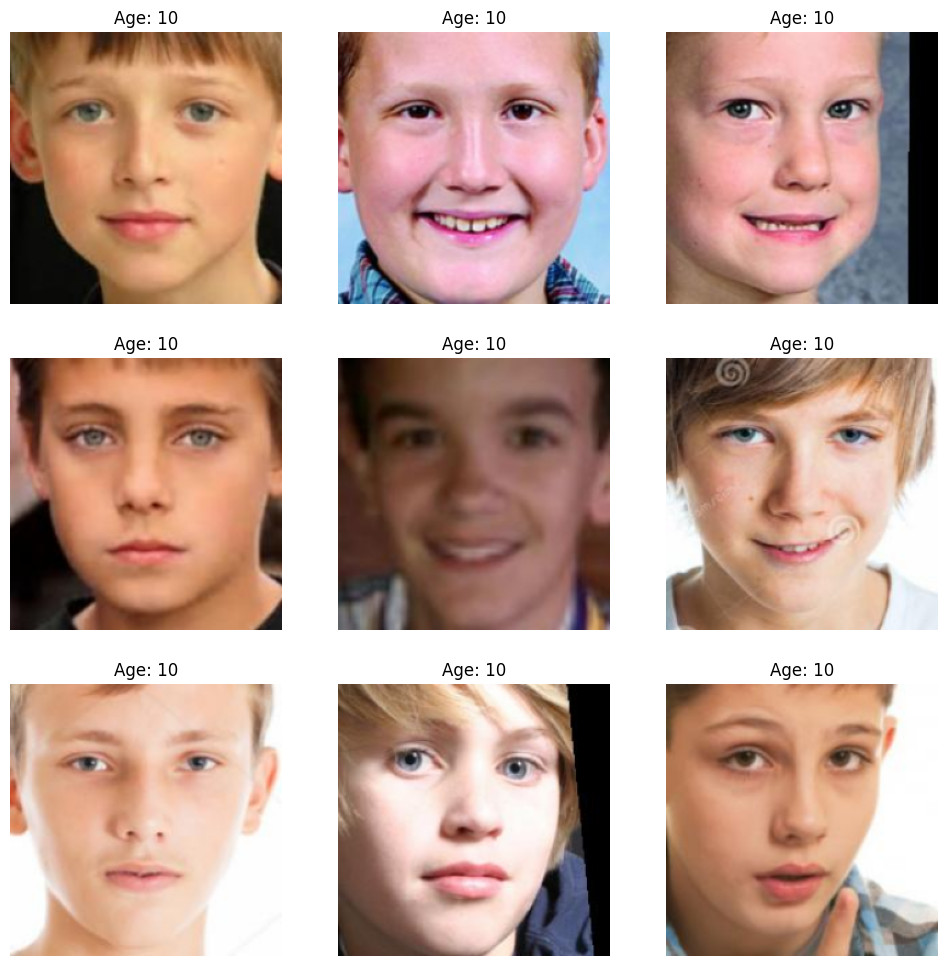

Processed 9 images and extracted ages: [10, 10, 10, 10, 10, 10, 10, 10, 10]


In [8]:
from pathlib import Path
import cv2 as cv
import matplotlib.pyplot as plt
import os
import random

# Define the path to your dataset folder
image_folder_path = Path("C:/Users/Om Sai/Desktop/Machine Learning Internship/Project 1/UTKFace")
images = list(image_folder_path.rglob("*.jpg"))


# Check if we have enough images
if len(images) < 9:
    print("Not enough images to process.")
else:
    selected_images = random.sample(images, 9)

    image_list = []
    age_list = []

    plt.figure(figsize=(12, 12))

    # Loop over 9 images with an index counter
    for i, image_path in enumerate(images[:9]):
        # Read the image
        img = cv.imread(str(image_path))

        # Check if the image was loaded correctly
        if img is None:
            print(f"Could not read image: {image_path}")
            continue

        # Resize the image
        resized_img = cv.resize(img, (224, 224))

        # Normalize the image
        normalized_img = resized_img / 255.0

        # Append the processed image to the list
        image_list.append(normalized_img)

        # Extract age from filename (assuming age is the first part of the filename)
        img_filename = os.path.basename(image_path)
        age = int(img_filename.split('_')[0])
        
        # Append the age to the list
        age_list.append(age)

        # Display the image with its corresponding age
        plt.subplot(331 + i)
        plt.imshow(cv.cvtColor(resized_img, cv.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.title(f"Age: {age}")
        plt.axis('off')

    # Show all the images
    plt.show()

# Now image_list contains 9 processed images, and age_list contains corresponding ages
print(f"Processed {len(image_list)} images and extracted ages: {age_list}")




In [ ]:
# Convert lists to numpy arrays
x = np.array(image_list)
y = np.array(age_list)

# Now split the data into train and test sets
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y, random_state=42, stratify=y)

# Check the shape of the train and test sets to ensure they split correctly
print(f"x_train_age shape: {x_train_age.shape}, y_train_age shape: {y_train_age.shape}")
print(f"x_test_age shape: {x_test_age.shape}, y_test_age shape: {y_test_age.shape}")


x_train_age shape: (6, 224, 224, 3), y_train_age shape: (6,)
x_test_age shape: (3, 224, 224, 3), y_test_age shape: (3,)


In [ ]:

# Load VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1)  # Assuming 5 age classes
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print the model summary to check architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 21,137,729 (80.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set training parameters
epochs = 10  # Number of times to iterate over the dataset
batch_size = 32  # Number of samples per gradient update

# Define callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
tensorboard = TensorBoard(log_dir="logs/{}".format(datetime.now().strftime("%Y%m%d-%H%M%S")))

# Train the model
history = model.fit(
    x_train_age,  
    y_train_age,  
    validation_data=(x_test_age, y_test_age),  
    epochs=epochs,  
    batch_size=batch_size,  
    callbacks=[checkpoint, tensorboard],  
    verbose=1  
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 69s 69s/step - loss: 96.3607 - mae: 9.8145 - val_loss: 182.7943 - val_mae: 13.4972
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step - loss: 217.0118 - mae: 14.7123 - val_loss: 77.1519 - val_mae: 8.7836
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - loss: 77.3557 - mae: 8.7952 - val_loss: 412.4632 - val_mae: 20.2582
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step - loss: 476.3449 - mae: 21.8088 - val_loss: 82.2275 - val_mae: 9.0679
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 37s 37s/step - loss: 81.6409 - mae: 9.0355 - val_loss: 87.7158 - val_mae: 9.3656
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 52s 52s/step - loss: 87.0427 - mae: 9.3296 - val_loss: 66.4958 - val_mae: 8.1530
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - loss: 63.3978 - mae: 7.9618 - val_loss: 313.2058 - val_mae: 17.6168
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - loss: 474.8062 - mae: 21.6337 - val_loss: 86.1125 - val_mae: 9.2794
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 48s 48s/step - l

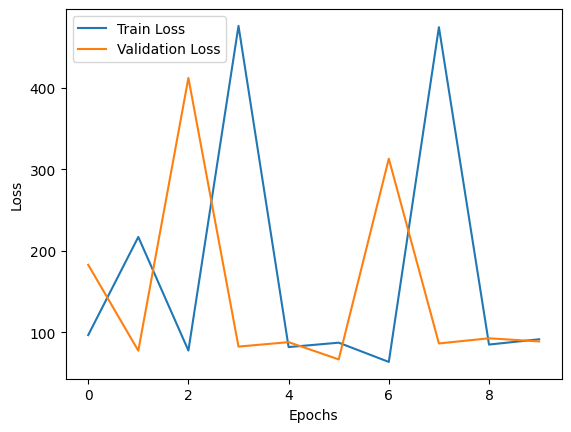

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 88.6028 - mae: 9.4128
Test Loss: 88.60283660888672, Test MAE: 9.412785530090332


In [6]:
# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_mae = model.evaluate(x_test_age, y_test_age)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")